In [2]:
!pip install tomotopy
import tomotopy as tp
import numpy as np
import gensim
from gensim import corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 17.2 MB/s eta 0:00:00


In [4]:
# Prepare the data
docs = [
    "Almost everyday I wake up hating myself, why would I hate myself though? I graduated High School, have a loving and healthy family, have hobbies and online friends. Yet I find myself so paranoid and hateful of myself, why do I deserve this life I have? Sometimes I just wanna scream, feeling like I'm trapped in another person's skin, I feel like all my accomplishments are fake and I'm a useless slab of meat who'll eventually die. I don't have real life friends, post secondary, a job, a car or a license and the closest family I have is 6 hours away and barely talks to me. I want to be happy for the good things in my life but find hating myself all too easy. When I hate myself I feel selfish, like I'm so self-absorbed that I only care about myself. I just want to be happy like people online or in my family, to just always see the glass half full and not always half empty"
    "This might sound ridiculous, but I want to die, and I'm not severely depressed. I'm approaching this purely philosophically. The way I see it, my life is more suffering than joy, and that's probably not going to change. In fact, I would say this is true of most people. We spend most of our time doing things we don't want to do: working, cleaning, driving in traffic, feeling hungry, experiencing physical discomfort, etc, etc. Why would it not be better to not exist at all (I don't believe in an afterlife) rather than experience the totality of consciousness? Now other people will mourn my death, this much is true. But they're going to mourn my death regardless of when it happens. No mourning is avoided by making it happen now. If anything, I'm at a point in my life when no one is dependent on me and my death will have the smallest impact it probably ever will. So why not die?"
    "I was just prescribed it for my severe depression and anxiety."
    "Has some of you ever sometimes or all the times tell yourself that I hate myself like it just comes out out of nowhere? Or I want to die. Like I can be in deep thought and it just comes out without me thinking like it's a habit or something. I sometimes have to look around to make sure no one heard me. Does anyone ever experience this? Am I explaining this clearly enough? Edit: thanks for all the comments today wasn't the best day for me or week for that matter. Y'all comments made me feel a little better. Especially Mr. Wicked91 thanks, man!!!!!"
    "If I could just, stop existing. I would do it in a heartbeat. But I can't... I have to commit suicide in order to do that. And even then I leave footsteps. My family would be hurt. I just wish that i was never born in the first place. Then a poor family wouldn't have to worry about me. This is one of the reasons i haven't done it yet. My girlfriend would also be very upset. I just want to go without anyone being sad about me, like I never even happened. That would be so nice"
    "Bad things happen to me, and worst of all, they're inevitable. I think I'm better off dead than alive."
    "To kill myself if im ugly?"
    "Indubitably, I am not worth anything as a being, contrary to the belief of all redditors who will reply to this, I have never once done anything correct in my life, all I have ever succeeded in has been to be hurtful and disrespectful to others and taking others for granted. All I breed is catastrophe. I am not at all talented or skilled at anything in particular, I am below average in every concept known to man. I have no motivation nor intention to progress in my life. I seem to be an inconvenience, an unpleasant burden towards society. I'd say my existence is more so comparable to a tumor, I am not productive and only produce negative effects on others that unfortunately have the unbearable pain that comes from interaction with someone like me. Entrapped in this body, I dream of going into eternal sleep, a great rest that lasts to the end of time. I do not have any interest in anything anymore, daily politics bore me a great deal and I'm not at all intrigued by life at all. I don't see a reason to not follow through with it when I have no intrinsic value and no drive nor intent to live at all."
]

# Preprocess the data
stop_words = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stop_words]
         for document in docs]

corpus = tp.utils.Corpus()

In [5]:
# Add documents to the corpus
for i, doc in enumerate(texts):
    corpus.add_doc(doc)

# Train the CTM model
model = tp.CTModel(k=6, corpus=corpus, seed=1234)
model.train(100)


<ipython-input-5-4ffa5c689113>:7: RuntimeWarning: The training result may differ even with fixed seed if `workers` != 1.
  model.train(100)


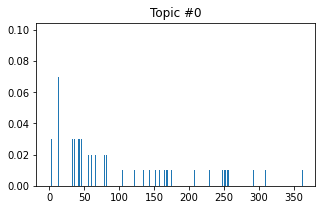

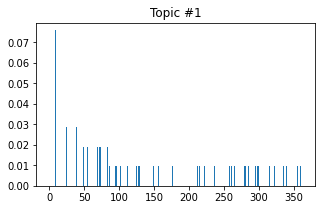

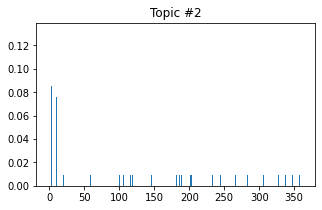

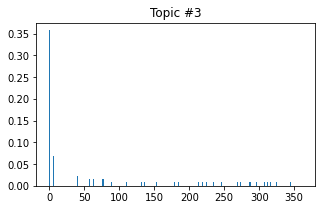

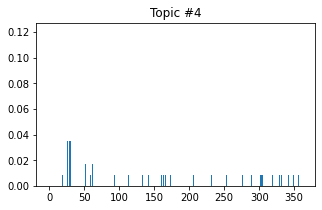

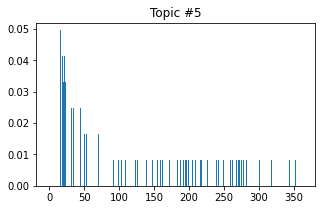

In [6]:
# Visualize the results
for k in range(model.k):
    plt.figure(figsize=(5, 3))
    plt.bar(range(len(model.used_vocabs)), model.get_topic_word_dist(k))
    plt.title("Topic #" + str(k))
    plt.show()